# Business Objective

An E Commerce company or DTH (you can choose either of these two domains) provider is 
facing a lot of competition in the current market and it has become a challenge to retain the 
existing customers in the current situation. Hence, the company wants to develop a model 
through which they can do churn prediction of the accounts and provide segmented offers to the 
potential churners. In this company, account churn is a major thing because 1 account can have 
multiple customers. hence by losing one account the company might be losing more than one 
customer.
You have been assigned to develop a churn prediction model for this company and provide 
business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because 
your recommendation will go through the revenue assurance team. If they find that you are 
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going 
to approve your recommendation. 
Hence be very careful while providing campaign recommendation.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics
from imblearn.combine import SMOTEENN

#### Read the Data

In [2]:
Churn_Data = pd.read_excel('customer_churn_data.xlsx', sheet_name= 'Data for DSBA')
Churn_Data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


### 1. Problem Understanding

##### a) Defining problem statement

#####  b) Need of the study/project

##### c) Understanding business/social opportunity

### 2. Data Report

##### a) Understanding how data was collected in terms of time, frequency and methodology

The data was provided by Great learning team for capstone project. I don't have any information how they collected, its collection time

##### b) Visual inspection of data (rows, columns, descriptive details) c) Understanding of attributes (variable info, renaming if required)

In [3]:
## Checking the shape of the data: Number of columns and rows

Churn_Data.shape

(11260, 19)

In [4]:
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
Churn_Data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [6]:
Churn_Data_duplicates = Churn_Data[Churn_Data.duplicated()]
Churn_Data_duplicates

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [7]:
Churn_Data.duplicated().sum()

0

In [8]:
Churn_Data["Churn"].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

In [9]:
### Examine missing values
Churn_Data_na = Churn_Data.isna().sum()
Churn_Data_na[Churn_Data_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

cashback                471
Complain_ly             357
Day_Since_CC_connect    357
Login_device            221
Marital_Status          212
CC_Agent_Score          116
City_Tier               112
Account_user_count      112
Payment                 109
Gender                  108
Tenure                  102
CC_Contacted_LY         102
rev_per_month           102
Service_Score            98
account_segment          97
dtype: int64

### 3. Exploratory Data Analysis

##### a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones) 

In [10]:
Churn_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [11]:
Churn_Data.describe(include=['object'])

,Tenure,Payment,Gender,Account_user_count,account_segment,Marital_Status,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11158,11151,11152,11148,11163,11048,11158,11260,11260,10903,10789.00,11039
unique,38,5,4,7,7,3,59,20,20,24,5693.00,3
top,1,Debit Card,Male,4,Super,Married,3,14,1,3,155.62,Mobile
freq,1351,4587,6328,4569,4062,5860,1746,1524,4373,1816,10.00,7482


In [12]:
Churn_Data_num = Churn_Data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(Churn_Data_num.columns.values)
len(lstnumericcolumns)

7

In [13]:
def univariateAnalysis(column,nbins):
    print("----------------------------------------------------------------------------")
    print("Summary of " + column)
    print(Churn_Data_num[column].describe(),end=' ')
    
    
    print('\nmedian ------- ',Churn_Data_num[column].median())
    print('Nullvalue ---- ',Churn_Data_num[column].isnull().any())
    print('Skew ---------- ',Churn_Data_num[column].skew())
    
    plt.figure()
    print("----------------------------------------------------------------------------")
    print("Distribution Plot of " + column)
    sns.distplot(Churn_Data_num[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("----------------------------------------------------------------------------")
    print("Box Plot of " + column)
    ax = sns.boxplot(x=Churn_Data_num[column])
    plt.show()

----------------------------------------------------------------------------
Summary of AccountID
count    11260.00000
mean     25629.50000
std       3250.62635
min      20000.00000
25%      22814.75000
50%      25629.50000
75%      28444.25000
max      31259.00000
Name: AccountID, dtype: float64 
median -------  25629.5
Nullvalue ----  False
Skew ----------  0.0
----------------------------------------------------------------------------
Distribution Plot of AccountID


/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/777311035.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Churn_Data_num[column], kde=True, color='g');


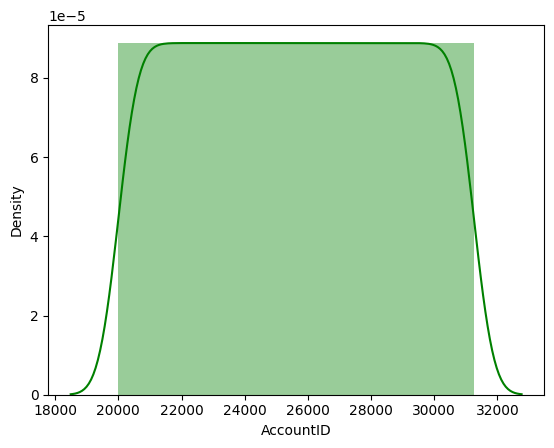

----------------------------------------------------------------------------
Box Plot of AccountID


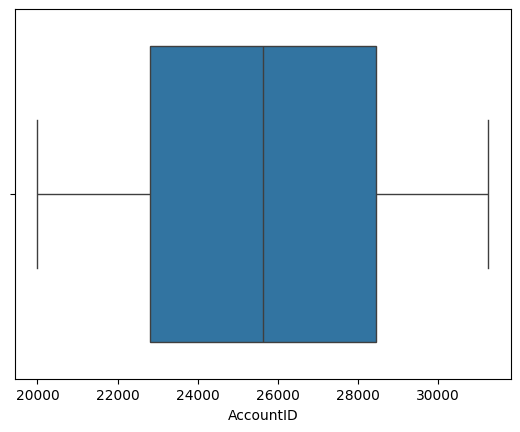

----------------------------------------------------------------------------
Summary of Churn
count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64 
median -------  0.0
Nullvalue ----  False
Skew ----------  1.77260635008676
----------------------------------------------------------------------------
Distribution Plot of Churn


/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/777311035.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Churn_Data_num[column], kde=True, color='g');


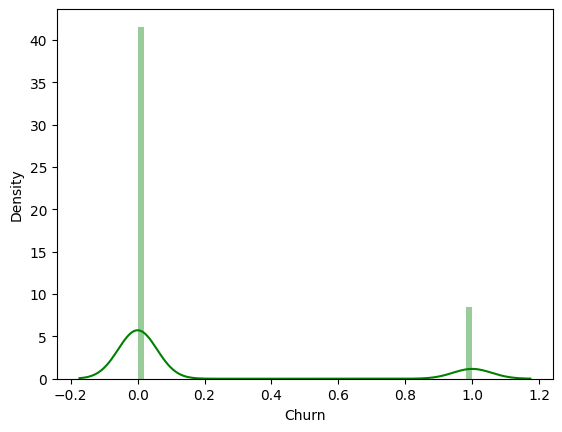

----------------------------------------------------------------------------
Box Plot of Churn


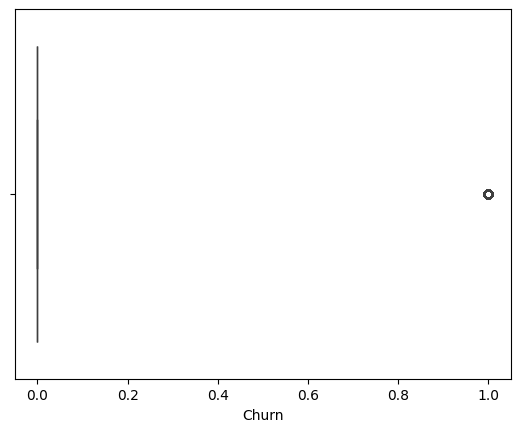

----------------------------------------------------------------------------
Summary of City_Tier
count    11148.000000
mean         1.653929
std          0.915015
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64 
median -------  1.0
Nullvalue ----  True
Skew ----------  0.737107117192927
----------------------------------------------------------------------------
Distribution Plot of City_Tier


/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/777311035.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Churn_Data_num[column], kde=True, color='g');


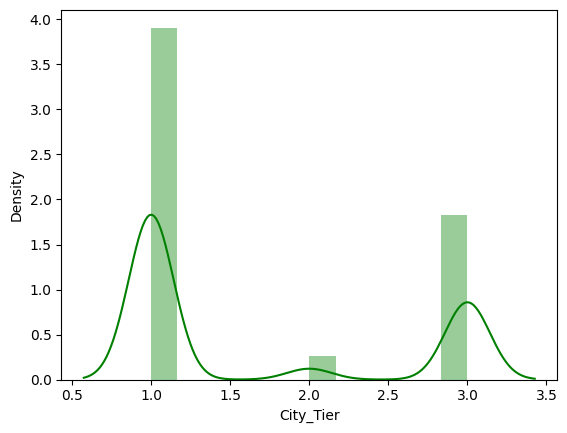

----------------------------------------------------------------------------
Box Plot of City_Tier


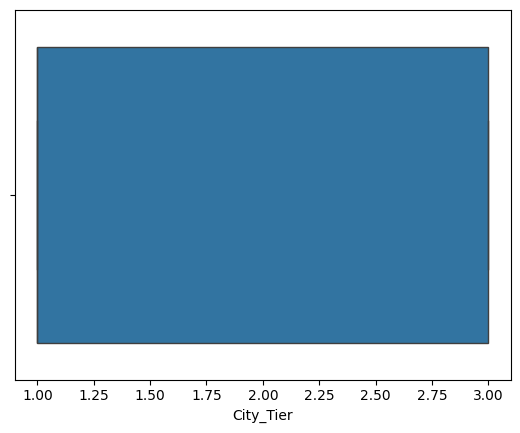

----------------------------------------------------------------------------
Summary of CC_Contacted_LY
count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64 
median -------  16.0
Nullvalue ----  True
Skew ----------  1.4229770400956239
----------------------------------------------------------------------------
Distribution Plot of CC_Contacted_LY


/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/777311035.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Churn_Data_num[column], kde=True, color='g');


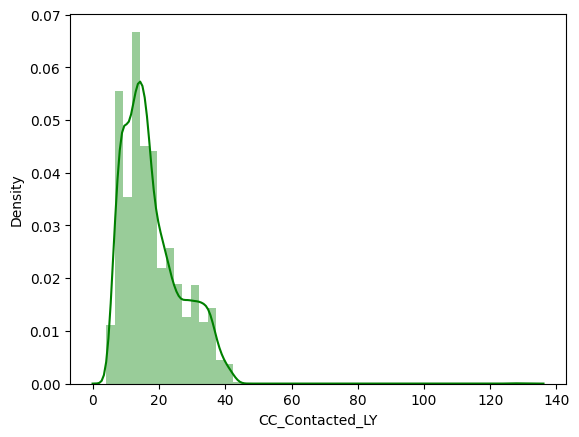

----------------------------------------------------------------------------
Box Plot of CC_Contacted_LY


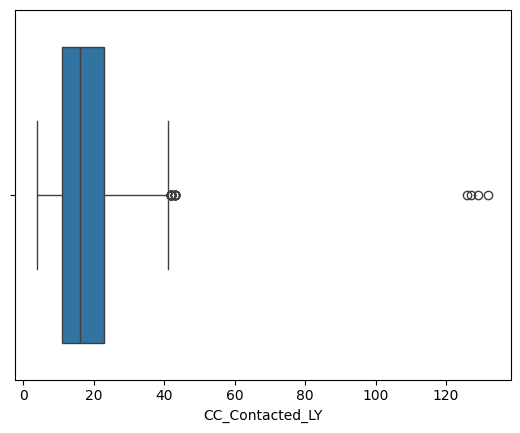

----------------------------------------------------------------------------
Summary of Service_Score
count    11162.000000
mean         2.902526
std          0.725584
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Service_Score, dtype: float64 
median -------  3.0
Nullvalue ----  True
Skew ----------  0.003891010352994846
----------------------------------------------------------------------------
Distribution Plot of Service_Score


/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/777311035.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Churn_Data_num[column], kde=True, color='g');


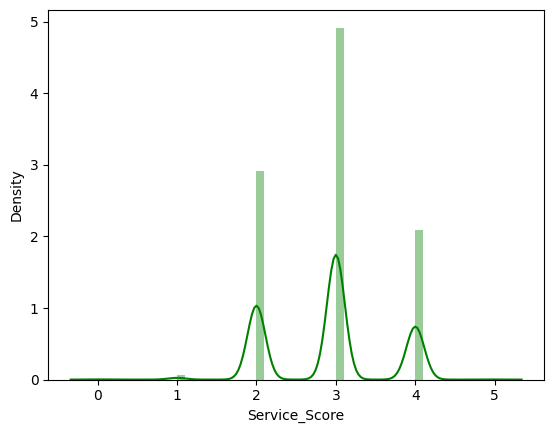

----------------------------------------------------------------------------
Box Plot of Service_Score


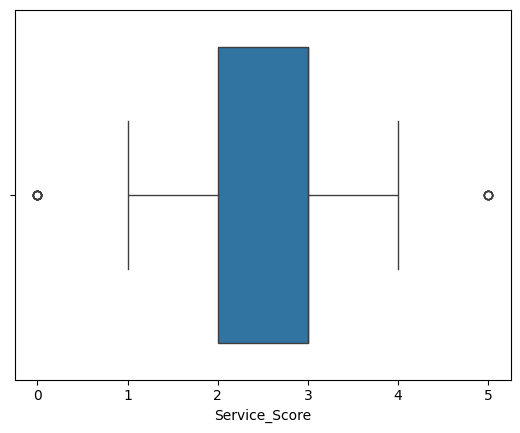

----------------------------------------------------------------------------
Summary of CC_Agent_Score
count    11144.000000
mean         3.066493
std          1.379772
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64 
median -------  3.0
Nullvalue ----  True
Skew ----------  -0.1421493423376801
----------------------------------------------------------------------------
Distribution Plot of CC_Agent_Score


/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/777311035.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Churn_Data_num[column], kde=True, color='g');


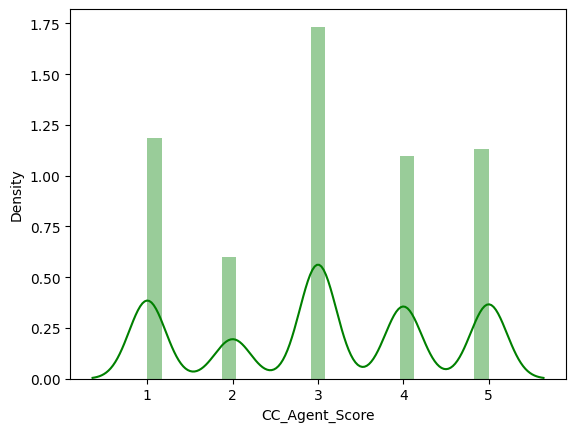

----------------------------------------------------------------------------
Box Plot of CC_Agent_Score


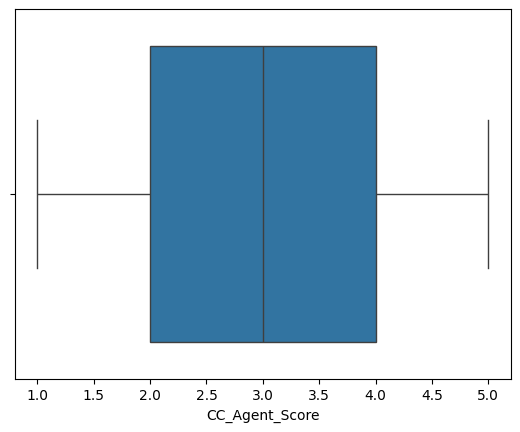

----------------------------------------------------------------------------
Summary of Complain_ly
count    10903.000000
mean         0.285334
std          0.451594
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Complain_ly, dtype: float64 
median -------  0.0
Nullvalue ----  True
Skew ----------  0.9508760720091717
----------------------------------------------------------------------------
Distribution Plot of Complain_ly


/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/777311035.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Churn_Data_num[column], kde=True, color='g');


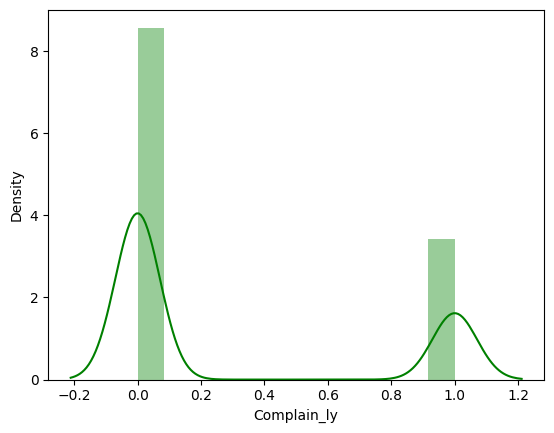

----------------------------------------------------------------------------
Box Plot of Complain_ly


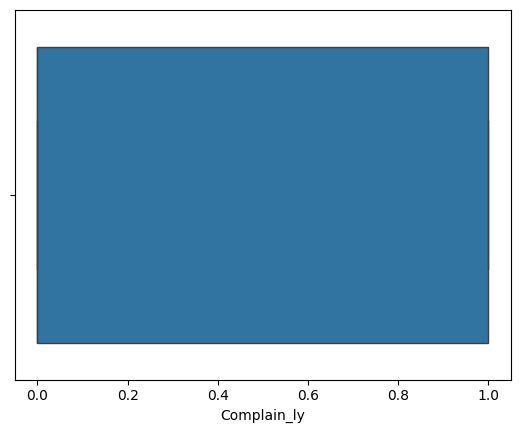

In [14]:
for x in lstnumericcolumns:
    univariateAnalysis(x,20)

**Categorical Variable Analysis**

**Login_device**

In [15]:
Churn_Data.Login_device.value_counts()

Login_device
Mobile      7482
Computer    3018
&&&&         539
Name: count, dtype: int64

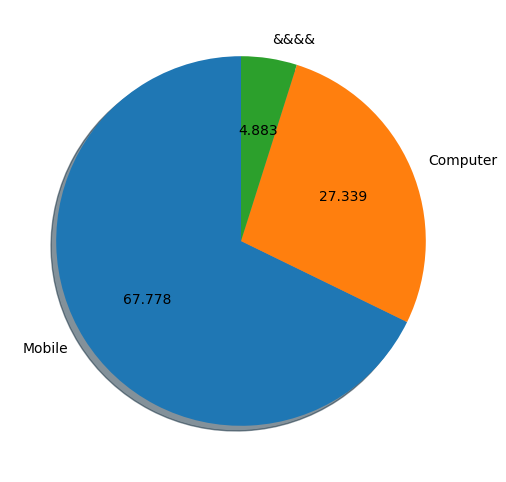

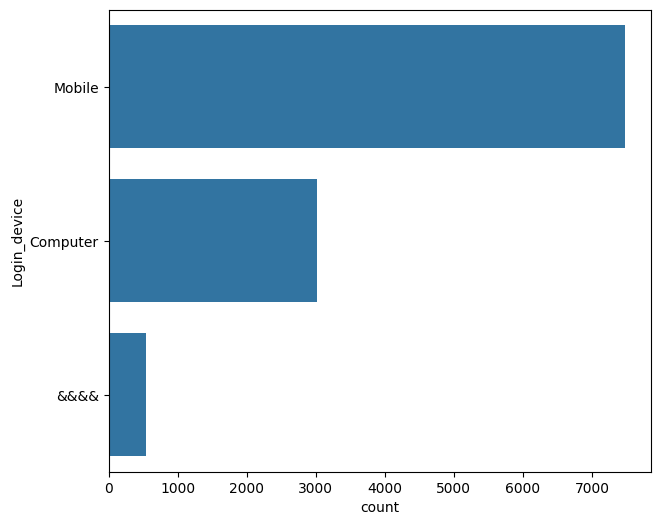

In [16]:
plt.figure(figsize = (6,6))
plt.pie(Churn_Data['Login_device'].value_counts(), startangle = 90,
        labels=['Mobile','Computer', '&&&&'], shadow=True, autopct='%.3f');

plt.figure(figsize = (7,6))
sns.countplot(Churn_Data['Login_device']);

**Complain_ly**

In [17]:
Churn_Data.Complain_ly.value_counts()

Complain_ly
0.0    7792
1.0    3111
Name: count, dtype: int64

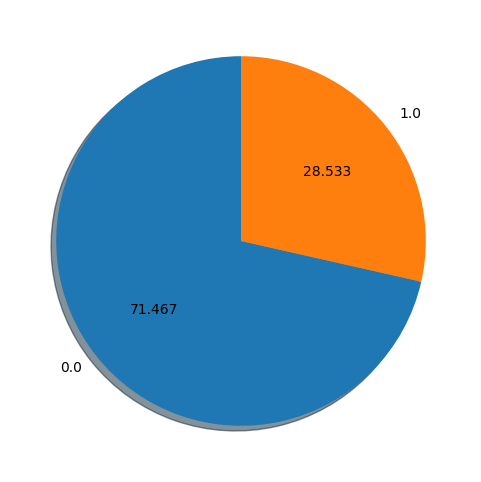

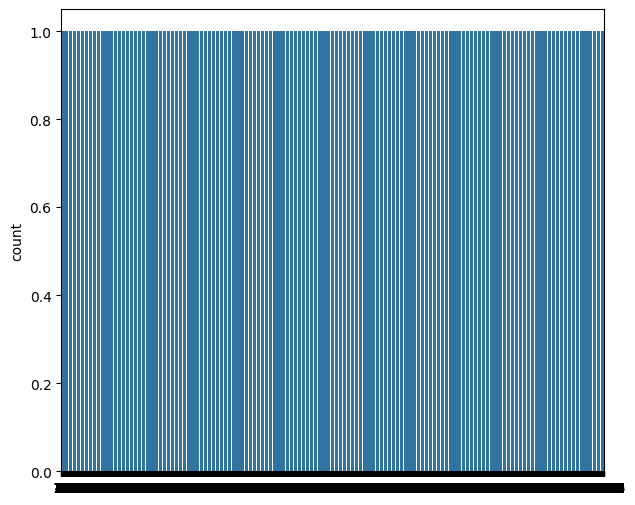

In [18]:
plt.figure(figsize = (6,6))
plt.pie(Churn_Data['Complain_ly'].value_counts(), startangle = 90,
        labels=['0.0','1.0'], shadow=True, autopct='%.3f');

plt.figure(figsize = (7,6))
sns.countplot(Churn_Data['Complain_ly']);

**Marital_Status**

In [19]:
Churn_Data.Marital_Status.value_counts()

Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: count, dtype: int64

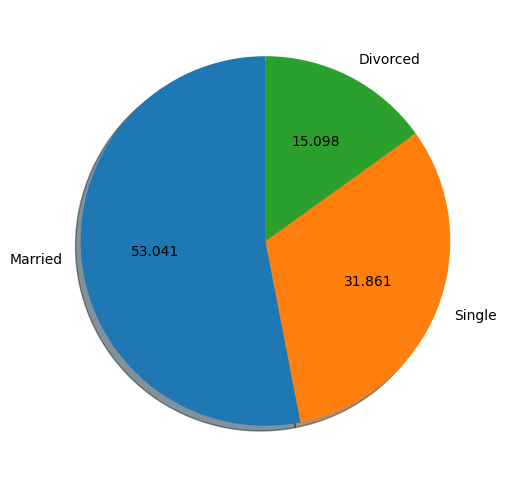

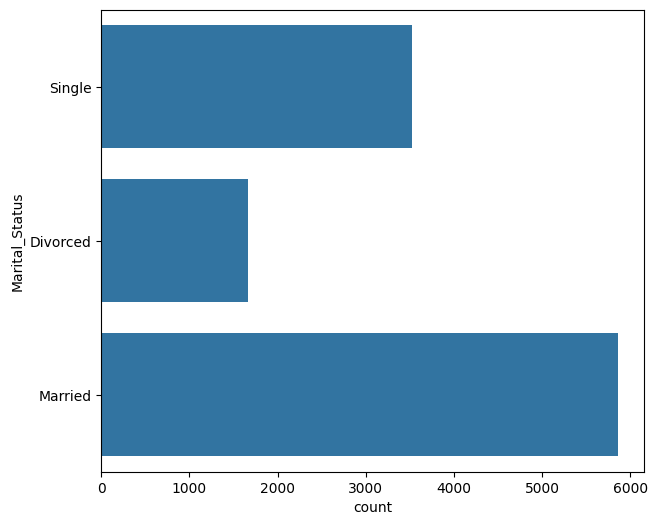

In [20]:
plt.figure(figsize = (6,6))
plt.pie(Churn_Data['Marital_Status'].value_counts(), startangle = 90,
        labels=['Married','Single', 'Divorced'], shadow=True, autopct='%.3f');

plt.figure(figsize = (7,6))
sns.countplot(Churn_Data['Marital_Status']);

In [21]:
Churn_Data.Account_user_count.value_counts()

Account_user_count
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: count, dtype: int64

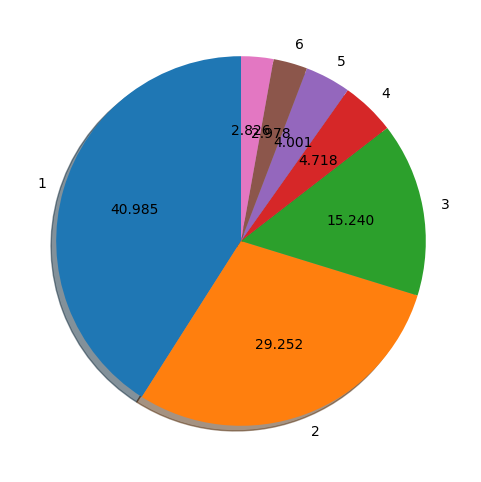

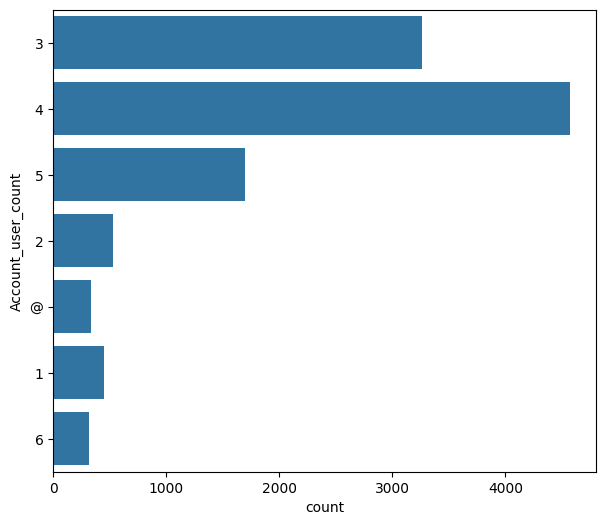

In [22]:
plt.figure(figsize = (6,6))
plt.pie(Churn_Data['Account_user_count'].value_counts(), startangle = 90,
        labels=['1','2','3','4','5','6', ''], shadow=True, autopct='%.3f');

plt.figure(figsize = (7,6))
sns.countplot(Churn_Data['Account_user_count']);

**Gender**

In [23]:
Churn_Data.Gender.value_counts()

Gender
Male      6328
Female    4178
M          376
F          270
Name: count, dtype: int64

##### b) Bivariate analysis (relationship between different variables , correlations)

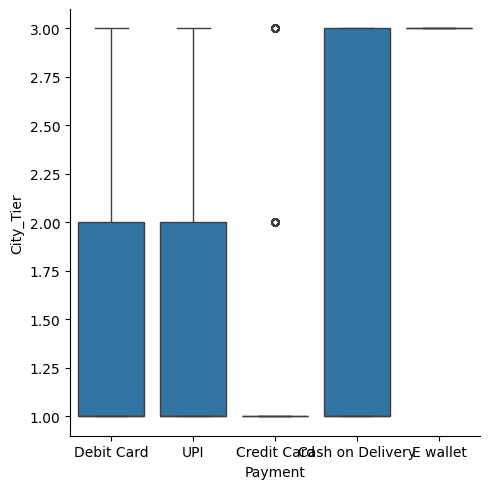

In [24]:
sns.catplot(x='Payment', y='City_Tier', kind='box', data=Churn_Data, aspect=1)

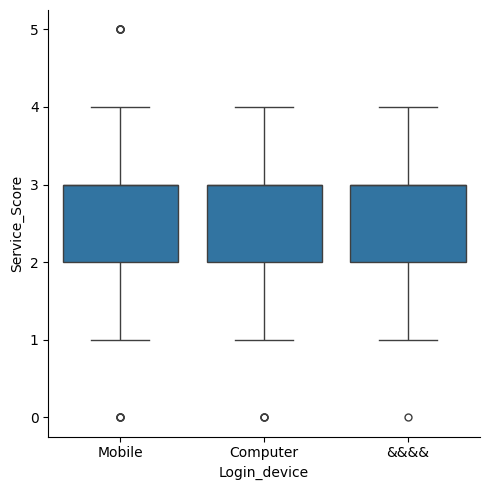

In [25]:
sns.catplot(x='Login_device', y='Service_Score', kind='box', data=Churn_Data, aspect=1)

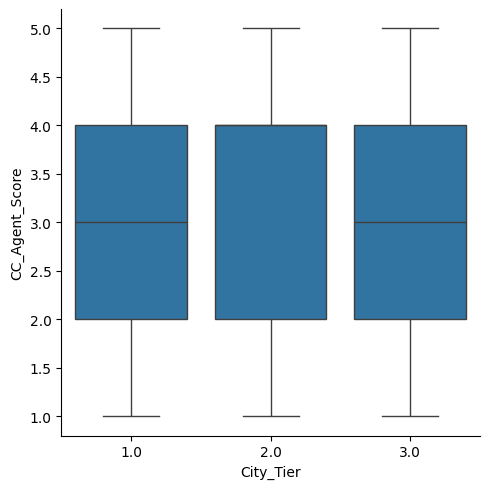

In [26]:
sns.catplot(x='City_Tier', y='CC_Agent_Score', kind='box', data=Churn_Data, aspect=1)

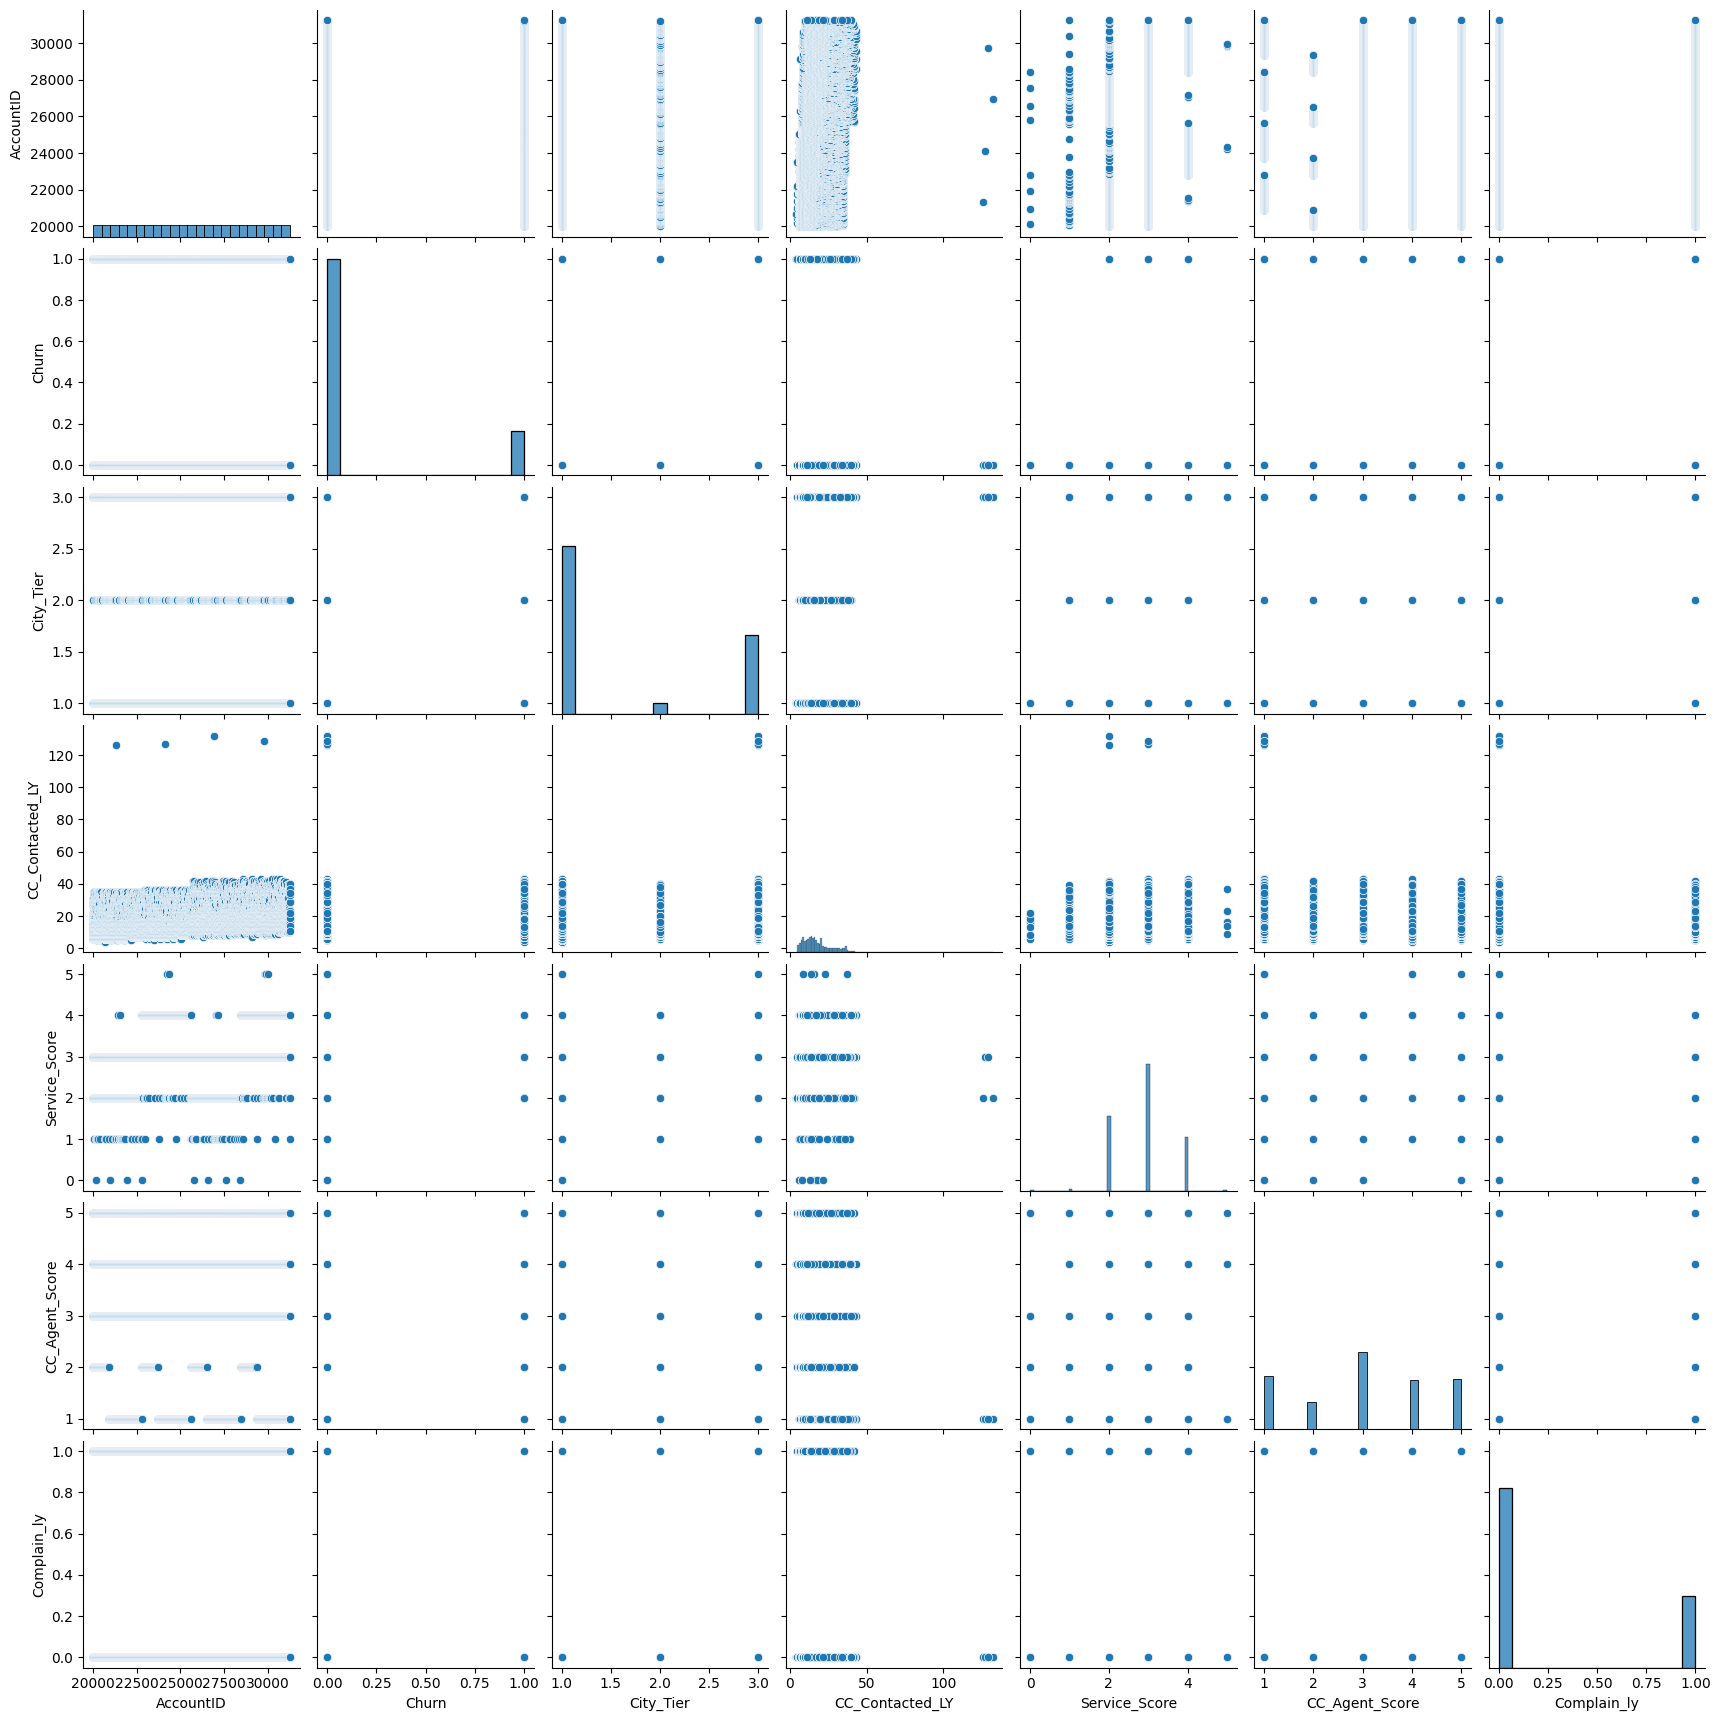

In [27]:
#Pair Plot
sns.pairplot(Churn_Data);

##### a) Removal of unwanted variables (if applicable) 

In [28]:
# AccountID is not a usefull column here, so we are just dropping that column
Churn_Data = Churn_Data.drop(['AccountID'], axis=1)


In [29]:
Churn_Data.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


##### b) Missing Value treatment (if applicable) 

In [30]:
### Examine missing values
Churn_Data_na = Churn_Data.isna().sum()
Churn_Data_na[Churn_Data_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

cashback                471
Complain_ly             357
Day_Since_CC_connect    357
Login_device            221
Marital_Status          212
CC_Agent_Score          116
City_Tier               112
Account_user_count      112
Payment                 109
Gender                  108
Tenure                  102
CC_Contacted_LY         102
rev_per_month           102
Service_Score            98
account_segment          97
dtype: int64

In [31]:
Churn_Data.isnull().sum().sum() 

2676

**Data have large number of errors and special character. So we will replace with NaN** 

In [32]:
Churn_Data['Tenure']=np.where(Churn_Data['Tenure'] =='#', None, Churn_Data['Tenure'])


In [33]:
Churn_Data['Account_user_count']=np.where(Churn_Data['Account_user_count'] =='@', None, Churn_Data['Account_user_count'])

In [34]:
Churn_Data['rev_per_month']=np.where(Churn_Data['rev_per_month'] =='+', None, Churn_Data['rev_per_month'])

In [35]:
Churn_Data['rev_growth_yoy']=np.where(Churn_Data['rev_growth_yoy'] =='$', None, Churn_Data['rev_growth_yoy'])

In [36]:
Churn_Data['coupon_used_for_payment']=np.where(Churn_Data['coupon_used_for_payment'] =='#', None, Churn_Data['coupon_used_for_payment'])
Churn_Data['coupon_used_for_payment']=np.where(Churn_Data['coupon_used_for_payment'] =='$', None, Churn_Data['coupon_used_for_payment'])
Churn_Data['coupon_used_for_payment']=np.where(Churn_Data['coupon_used_for_payment'] =='*', None, Churn_Data['coupon_used_for_payment'])

In [37]:
Churn_Data['Day_Since_CC_connect']=np.where(Churn_Data['Day_Since_CC_connect'] =='$', None, Churn_Data['Day_Since_CC_connect'])

In [38]:
Churn_Data['cashback']=np.where(Churn_Data['cashback'] =='$', None, Churn_Data['cashback'])

In [39]:
Churn_Data['Login_device']=np.where(Churn_Data['Login_device'] =='&&&&', None, Churn_Data['Login_device'])

**Treating Null value with Mode**

In [40]:
Churn_Data['Tenure'] = Churn_Data['Tenure'].fillna(Churn_Data['Tenure'].mode()[0])
Churn_Data['City_Tier'] = Churn_Data['City_Tier'].fillna(Churn_Data['City_Tier'].mode()[0])
Churn_Data['CC_Contacted_LY'] = Churn_Data['CC_Contacted_LY'].fillna(Churn_Data['CC_Contacted_LY'].mode()[0])
Churn_Data['Payment'] = Churn_Data['Payment'].fillna(Churn_Data['Payment'].mode()[0])
Churn_Data['Gender'] = Churn_Data['Gender'].fillna(Churn_Data['Gender'].mode()[0])
Churn_Data['Service_Score'] = Churn_Data['Service_Score'].fillna(Churn_Data['Service_Score'].mode()[0])
Churn_Data['Account_user_count'] = Churn_Data['Account_user_count'].fillna(Churn_Data['Account_user_count'].mode()[0])
Churn_Data['account_segment'] = Churn_Data['account_segment'].fillna(Churn_Data['account_segment'].mode()[0])
Churn_Data['CC_Agent_Score'] = Churn_Data['CC_Agent_Score'].fillna(Churn_Data['CC_Agent_Score'].mode()[0])
Churn_Data['Marital_Status'] = Churn_Data['Marital_Status'].fillna(Churn_Data['Marital_Status'].mode()[0])
Churn_Data['rev_per_month'] = Churn_Data['rev_per_month'].fillna(Churn_Data['rev_per_month'].mode()[0])
Churn_Data['Complain_ly'] = Churn_Data['Complain_ly'].fillna(Churn_Data['Complain_ly'].mode()[0])
Churn_Data['rev_growth_yoy'] = Churn_Data['rev_growth_yoy'].fillna(Churn_Data['rev_growth_yoy'].mode()[0])
Churn_Data['coupon_used_for_payment'] = Churn_Data['coupon_used_for_payment'].fillna(Churn_Data['coupon_used_for_payment'].mode()[0])
Churn_Data['Day_Since_CC_connect'] = Churn_Data['Day_Since_CC_connect'].fillna(Churn_Data['Day_Since_CC_connect'].mode()[0])
Churn_Data['cashback'] = Churn_Data['cashback'].fillna(Churn_Data['cashback'].mode()[0])
Churn_Data['Login_device'] = Churn_Data['Login_device'].fillna(Churn_Data['Login_device'].mode()[0])


##### d) Outlier treatment (if required) 

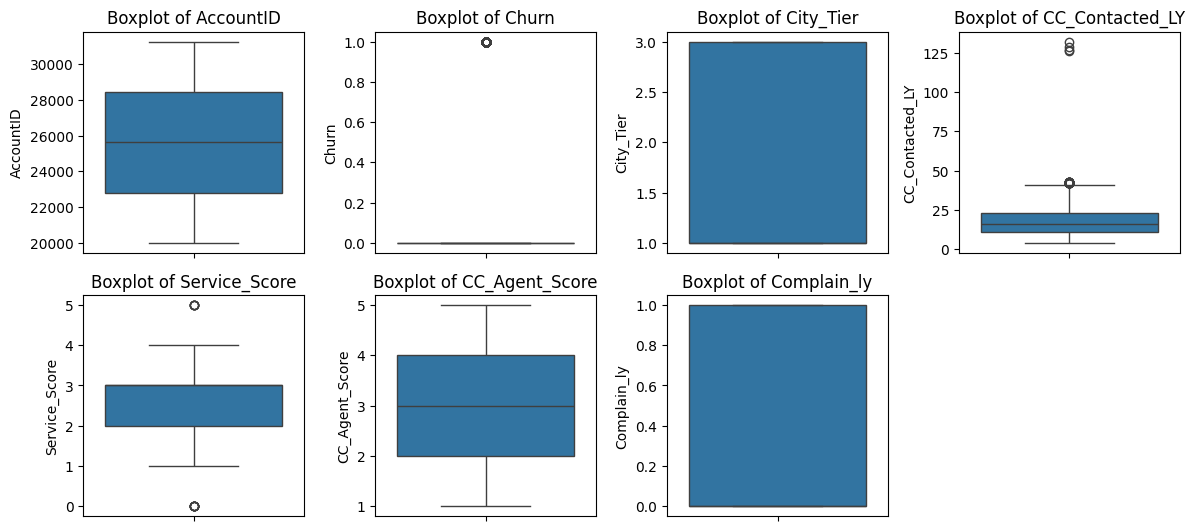

In [41]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = Churn_Data_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = Churn_Data_num[feature_list[i]], data = Churn_Data_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [42]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [43]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(Churn_Data['CC_Contacted_LY'])
print("lower range",lr, "and upper range", ur)

lower range -7.0 and upper range 41.0


In [44]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(Churn_Data['Service_Score'])
print("lower range",lr, "and upper range", ur)

lower range 0.5 and upper range 4.5


In [45]:
Churn_Data['Service_Score']=np.where(Churn_Data['Service_Score']>ur,ur,Churn_Data['Service_Score'])
Churn_Data['Service_Score']=np.where(Churn_Data['Service_Score']<lr,lr,Churn_Data['Service_Score'])

<Axes: xlabel='Service_Score'>

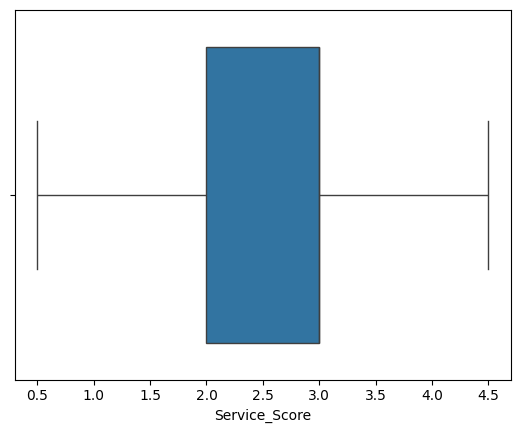

In [46]:
sns.boxplot(x=Churn_Data.Service_Score)

In [47]:
Churn_Data['CC_Contacted_LY']=np.where(Churn_Data['CC_Contacted_LY']>ur,ur,Churn_Data['CC_Contacted_LY'])
Churn_Data['CC_Contacted_LY']=np.where(Churn_Data['CC_Contacted_LY']<lr,lr,Churn_Data['CC_Contacted_LY'])

<Axes: xlabel='CC_Contacted_LY'>

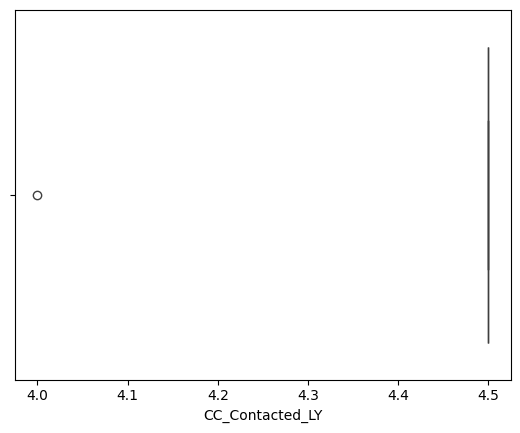

In [48]:
sns.boxplot(x=Churn_Data.CC_Contacted_LY)

##### e) Variable transformation (if applicable) 

In [49]:
Churn_Data['Marital_Status']=np.where(Churn_Data['Marital_Status'] =='Divorced', 'Single', Churn_Data['Marital_Status'])

In [50]:
Churn_Data['Gender']=np.where(Churn_Data['Gender'] =='M', 'Male', Churn_Data['Gender'])
Churn_Data['Gender']=np.where(Churn_Data['Gender'] =='F', 'Female', Churn_Data['Gender'])

##### f) Addition of new variables (if required)

### One Hot coding

In [51]:
Churn_Data = pd.get_dummies(Churn_Data)

Is the data unbalanced? If so, what can be done? Please explain in the context of the business  

In [52]:
Churn_Data.Churn.value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

In [53]:
Churn_Data['Churn'].value_counts(normalize = True)

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

The data is completely unbalanced because 0.16% churn customer and 83% of Unchurn customers are seen in following data.

We can apply Oversampling Smote.
SMOTE stands for Synthetic Minority Over-sampling Technique. This method creates synthetic samples of your data, so rather than taking copies of observations, SMOTE uses a distance measure to create synthetic samples of data points that would not be far from your data points. We used this in our churn analysis to balance the data.




In [54]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [55]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = Churn_Data.drop('Churn', axis=1)

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = Churn_Data[['Churn']]

# SMOTE
As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [58]:
from scipy.stats import zscore
X_scaled = X.apply(zscore)

In [59]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Logistic Regression

In [60]:
# Fit the Logistic Regression model
LR = LogisticRegression()
model_LR =LR.fit(X_train, y_train)

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_LR = model_LR.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_LR = model_LR.predict(X_test)

In [62]:
print("Logistic regression Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train_LR),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, pred_class_test_LR),'\n')

Logistic regression Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.85      0.83      6549
           1       0.84      0.81      0.82      6560

    accuracy                           0.83     13109
   macro avg       0.83      0.83      0.83     13109
weighted avg       0.83      0.83      0.83     13109
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.85      0.83      2815
           1       0.84      0.80      0.82      2804

    accuracy                           0.82      5619
   macro avg       0.82      0.82      0.82      5619
weighted avg       0.82      0.82      0.82      5619
 



# Ensemble: Random Forest
**In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set**

**Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features**

**The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model**

**the scikit-learn implementation combines classifiers by averaging their probabilistic prediction**

In [63]:
# Split X and y into training and test set in 70:30 ratio
X_train_EN_RF, X_test_EN_RF, y_train_EN_RF, y_test_EN_RF = train_test_split(X, y, test_size=0.30 , random_state=1)

In [64]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
EN_RF=RandomForestClassifier()

In [65]:
#Train the model using the training sets y_pred=clf.predict(X_test)
model_EN_RF = EN_RF.fit(X_train_EN_RF,y_train_EN_RF)

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [66]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_EN_RF = model_EN_RF.predict(X_train_EN_RF)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_EN_RF = model_EN_RF.predict(X_test_EN_RF)

In [67]:
print("Ensemble Random Forest Classifier Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_EN_RF,pred_class_train_EN_RF),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test_EN_RF, pred_class_test_EN_RF),'\n')

Ensemble Random Forest Classifier Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2815
           1       0.98      0.99      0.98      2804

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619
 



# KNN Model

In [68]:
# Split X and y into training and test set in 70:30 ratio
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X, y, test_size=0.30 , random_state=1)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
model_KNN = KNN.fit(X_train_KNN, y_train_KNN)

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [70]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_KNN = model_KNN.predict(X_train_KNN)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_KNN = model_KNN.predict(X_test_KNN)

In [71]:
print(metrics.classification_report(y_train_KNN, pred_class_train_KNN))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      6549
           1       0.89      0.99      0.94      6560

    accuracy                           0.94     13109
   macro avg       0.94      0.94      0.94     13109
weighted avg       0.94      0.94      0.94     13109



In [72]:
print(metrics.classification_report(y_test_KNN, pred_class_test_KNN))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2815
           1       0.86      0.99      0.92      2804

    accuracy                           0.91      5619
   macro avg       0.92      0.91      0.91      5619
weighted avg       0.92      0.91      0.91      5619



**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

In [73]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_KNN, y_train_KNN)
    # evaluate test accuracy
    scores = knn.score(X_test_KNN, y_test_KNN)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed 

[0.03915287417689983,
 0.0692294002491547,
 0.08916177255739455,
 0.10606869549741949,
 0.1179925253603844,
 0.1281366791243994,
 0.13400961025093427,
 0.14059441181704935,
 0.14255205552589434,
 0.14700124577326923,
 0.1478910838227443,
 0.1503826303612742,
 0.15394198255917424,
 0.15874710802633918,
 0.15963694607581425]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

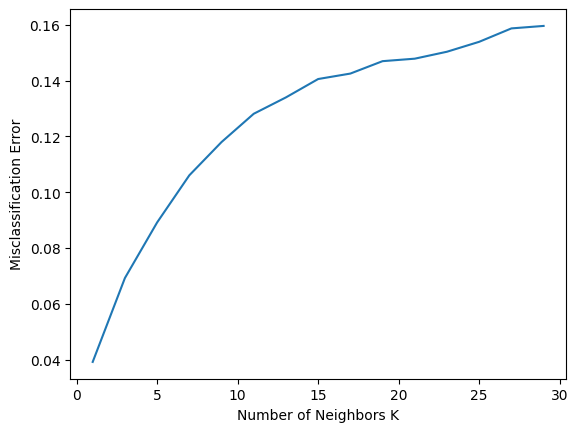

In [74]:
# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [75]:
KNN=KNeighborsClassifier(n_neighbors=1)
model_KNN = KNN.fit(X_train_KNN, y_train_KNN)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_KNN = model_KNN.predict(X_train_KNN)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_KNN = model_KNN.predict(X_test_KNN)

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**I am selecting k=1 as best optimizing k value**

# Bagging Classifier
**A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.**

In [76]:
# Split X and y into training and test set in 70:30 ratio
X_train_EN_BG, X_test_EN_BG, y_train_EN_BG, y_test_EN_BG = train_test_split(X, y, test_size=0.30 , random_state=1)

In [77]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

model_EN_BG = bgcl.fit(X_train_EN_BG, y_train_EN_BG)

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_EN_BG = model_EN_BG.predict(X_train_EN_BG)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_EN_BG = model_EN_BG.predict(X_test_EN_BG)

In [79]:
print(metrics.classification_report(y_train_EN_BG, pred_class_train_EN_BG))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109



In [80]:
print(metrics.classification_report(y_test_EN_BG, pred_class_test_EN_BG))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2815
           1       0.98      0.98      0.98      2804

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619



# Gradient Boosting
*Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.*

In [81]:
# Split X and y into training and test set in 70:30 ratio
X_train_EN_GB, X_test_EN_GB, y_train_EN_GB, y_test_EN_GB = train_test_split(X, y, test_size=0.30)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
model_EN_GB = gbcl.fit(X_train_EN_GB, y_train_EN_GB)

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
pred_class_train_EN_GB = model_EN_GB.predict(X_train_EN_GB)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_EN_GB = model_EN_GB.predict(X_test_EN_GB)

In [85]:
print("Ensemble Gradient Boosting Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_EN_GB,pred_class_train_EN_GB),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test_EN_GB, pred_class_test_EN_GB),'\n')

Ensemble Gradient Boosting Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.91      0.90      6551
           1       0.91      0.88      0.90      6558

    accuracy                           0.90     13109
   macro avg       0.90      0.90      0.90     13109
weighted avg       0.90      0.90      0.90     13109
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.91      0.89      2813
           1       0.91      0.87      0.89      2806

    accuracy                           0.89      5619
   macro avg       0.89      0.89      0.89      5619
weighted avg       0.89      0.89      0.89      5619
 



# Model Tuning

Random Forest and Bagging Classifier giving good result compare to other models.
So we are applying Grid Search Hyperparameter to this model

In [86]:
from sklearn.model_selection import GridSearchCV

### Bagging Classifier

In [87]:
param_grid = {
    #'base_estimator':['DecisionTreeClassifier],
    #'base_estimator__max_depth':[4, 5, 6],
    'max_samples': [20,40,60,80,100],
    'n_estimators': [10,20]
}

bg = BaggingClassifier()

grid_search_EN_BG = GridSearchCV(estimator = bg, param_grid = param_grid, cv = 3)

In [88]:
grid_search_EN_BG.fit(X_train_EN_BG, y_train_EN_BG)

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when 

GridSearchCV(cv=3, estimator=BaggingClassifier(),
             param_grid={'max_samples': [20, 40, 60, 80, 100],
                         'n_estimators': [10, 20]})

In [89]:
grid_search_EN_BG.best_params_

{'max_samples': 100, 'n_estimators': 10}

In [90]:
best_grid_EN_BG = grid_search_EN_BG.best_estimator_

In [91]:
pred_class_train_EN_BG_T = best_grid_EN_BG.predict(X_train_EN_BG)
pred_class_test_EN_BG_T = best_grid_EN_BG.predict(X_test_EN_BG)

In [92]:
print(metrics.classification_report(y_train_EN_BG, pred_class_train_EN_BG_T))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6549
           1       0.85      0.80      0.82      6560

    accuracy                           0.83     13109
   macro avg       0.83      0.83      0.83     13109
weighted avg       0.83      0.83      0.83     13109



In [93]:
print(metrics.classification_report(y_test_EN_BG, pred_class_test_EN_BG_T))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2815
           1       0.84      0.80      0.82      2804

    accuracy                           0.83      5619
   macro avg       0.83      0.83      0.83      5619
weighted avg       0.83      0.83      0.83      5619



### Random Forest

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,4,5,6],
    'max_features': [1,2,3, 4],
    'min_samples_leaf': [10,20,40,60],
    'min_samples_split': [50,100, 150],
    'n_estimators': [50, 100,150]
}

rf = RandomForestClassifier()

grid_search_EN_RF = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [95]:
grid_search_EN_RF.fit(X_train_EN_RF, y_train_EN_RF)

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d a

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 20, 40, 60],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 150]})

In [96]:
grid_search_EN_RF.best_params_

{'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 150}

In [97]:
best_grid_EN_RF = grid_search_EN_RF.best_estimator_

In [98]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_EN_RF_T = best_grid_EN_RF.predict(X_train_EN_RF)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_EN_RF_T = best_grid_EN_RF.predict(X_test_EN_RF)

In [99]:
print(metrics.classification_report(y_train_EN_RF, pred_class_train_EN_RF_T))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6549
           1       0.90      0.88      0.89      6560

    accuracy                           0.89     13109
   macro avg       0.89      0.89      0.89     13109
weighted avg       0.89      0.89      0.89     13109



In [100]:
print(metrics.classification_report(y_test_EN_RF, pred_class_test_EN_RF_T))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2815
           1       0.89      0.87      0.88      2804

    accuracy                           0.88      5619
   macro avg       0.88      0.88      0.88      5619
weighted avg       0.88      0.88      0.88      5619



### Gradient Boosting

In [101]:
#Creating a grid of hyperparameters
param_grid = {    
    'n_estimators':[250, 500, 750],
    'learning_rate':[0.1,1, 10],
}

GB = GradientBoostingClassifier()
grid_search_EN_GB= GridSearchCV(estimator=GB, param_grid=param_grid)

In [102]:
grid_search_EN_GB.fit(X_train_EN_GB, y_train_EN_GB)

/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hddevadi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expec

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 1, 10],
                         'n_estimators': [250, 500, 750]})

In [103]:
grid_search_EN_GB.best_params_

{'learning_rate': 1, 'n_estimators': 750}

In [104]:
best_grid_EN_GB = grid_search_EN_GB.best_estimator_

In [105]:
pred_class_train_EN_GB_T = best_grid_EN_GB.predict(X_train_EN_GB)
pred_class_test_EN_GB_T = best_grid_EN_GB.predict(X_test_EN_GB)

In [106]:
print(metrics.classification_report(y_train_EN_GB, pred_class_train_EN_GB_T))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6551
           1       1.00      1.00      1.00      6558

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109



In [107]:
print(metrics.classification_report(y_test_EN_GB, pred_class_test_EN_GB_T))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2813
           1       0.98      0.98      0.98      2806

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619



### b. Test your predictive model against the test set using various appropriate performance metrics

**Performance of Predictions on Train and Test sets of Logistic regression analysis**

In [108]:
print("Accuracy score  for Logistic regression  train variables ")
LR_model_train_score = model_LR.score(X_train, y_train)
print (LR_model_train_score)

Accuracy score  for Logistic regression  train variables 
0.8275993592188573


In [109]:
print("Accuracy score  for Logistic regression  test variables ")
LR_model_test_score  = model_LR.score(X_test, y_test)
print (LR_model_test_score)

Accuracy score  for Logistic regression  test variables 
0.820786616835736


**Training Data and Test Data Confusion Matrix Comparison**

 confusion matrix Train variables for logistic regression 


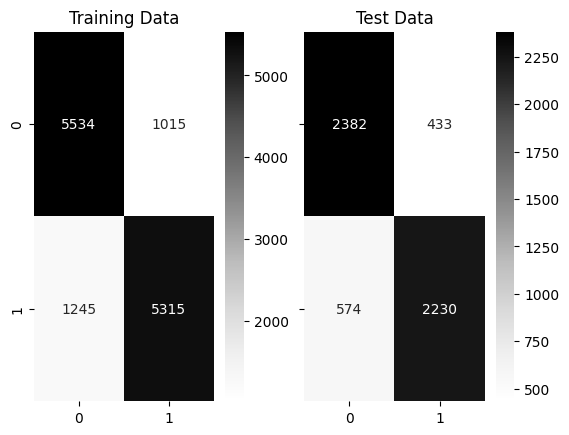

In [110]:
print(" confusion matrix Train variables for logistic regression ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train, pred_class_train_LR),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(metrics.confusion_matrix(y_test, pred_class_test_LR),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

**classification_report**

In [111]:
print("Logistic regression Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train_LR),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, pred_class_test_LR),'\n')

Logistic regression Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.85      0.83      6549
           1       0.84      0.81      0.82      6560

    accuracy                           0.83     13109
   macro avg       0.83      0.83      0.83     13109
weighted avg       0.83      0.83      0.83     13109
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.85      0.83      2815
           1       0.84      0.80      0.82      2804

    accuracy                           0.82      5619
   macro avg       0.82      0.82      0.82      5619
weighted avg       0.82      0.82      0.82      5619
 



**Plot ROC curve and get ROC_AUC**

AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.903
AUC for the Test Data: 0.896


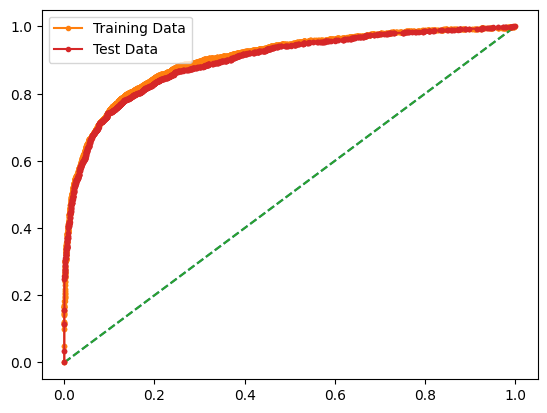

In [112]:
print("AUC and ROC FOR Logistic regression")

LR_pred_prob_train = model_LR.predict_proba(X_train)

LR_pred_prob_test = model_LR.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
LR_train_auc = metrics.roc_auc_score(y_train,LR_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % LR_train_auc)

#  calculate roc curve
LR_train_fpr, LR_train_tpr, thresholds = metrics.roc_curve(y_train,LR_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr, LR_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
LR_test_auc = metrics.roc_auc_score(y_test,LR_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % LR_test_auc)

#  calculate roc curve
LR_test_fpr,LR_test_tpr, thresholds = metrics.roc_curve(y_test,LR_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Performance of Predictions on Train and Test sets of KNN Model**

**Accuracy**

In [113]:
print("Accuracy score  for KNN Model  train variables ")
KNN_model_train_score = model_KNN.score(X_train_KNN, y_train_KNN)
print (KNN_model_train_score)

Accuracy score  for KNN Model  train variables 
1.0


In [114]:
print("Accuracy score  for KNN Model  test variables ")
KNN_model_test_score  = model_KNN.score(X_test_KNN, y_test_KNN)
print (KNN_model_test_score)

Accuracy score  for KNN Model  test variables 
0.9608471258231002


**Training Data and Test Data Confusion Matrix Comparison**

 confusion matrix Train variables for KNN Model 


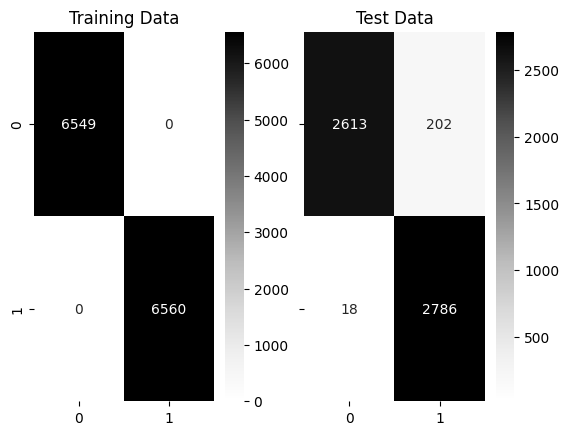

In [115]:
print(" confusion matrix Train variables for KNN Model ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train_KNN, pred_class_train_KNN),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(metrics.confusion_matrix(y_test_KNN, pred_class_test_KNN),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

**Classification Report**

In [116]:
print("KNN Model Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_KNN,pred_class_train_KNN),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test_KNN, pred_class_test_KNN),'\n')

KNN Model Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.93      0.96      2815
           1       0.93      0.99      0.96      2804

    accuracy                           0.96      5619
   macro avg       0.96      0.96      0.96      5619
weighted avg       0.96      0.96      0.96      5619
 



AUC and ROC FOR KNN Model
AUC for the Training Data: 1.000
AUC for the Test Data: 0.961


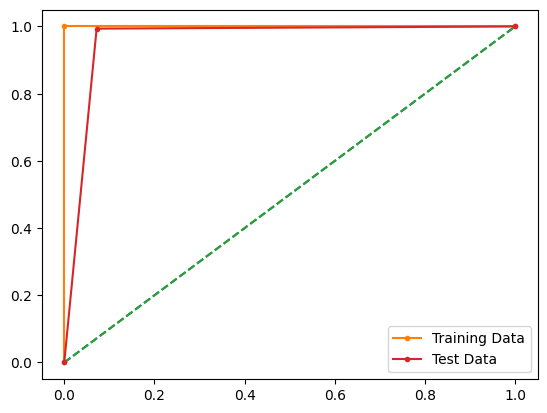

In [117]:
print("AUC and ROC FOR KNN Model")

KNN_pred_prob_train = model_KNN.predict_proba(X_train_KNN)

KNN_pred_prob_test = model_KNN.predict_proba(X_test_KNN)

# AUC and ROC for the training data

# calculate AUC
KNN_train_auc = metrics.roc_auc_score(y_train_KNN,KNN_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % KNN_train_auc)

#  calculate roc curve
KNN_train_fpr, KNN_train_tpr, thresholds = metrics.roc_curve(y_train_KNN,KNN_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
KNN_test_auc = metrics.roc_auc_score(y_test_KNN,KNN_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % KNN_test_auc)

#  calculate roc curve
KNN_test_fpr,KNN_test_tpr, thresholds = metrics.roc_curve(y_test_KNN,KNN_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Performance of Predictions on Train and Test sets of Ensemble Random Forest Classifier**

**Accuracy**

In [118]:
print("Accuracy score  for Ensemble Random Forest Classifier  train variables ")
EN_RF_model_train_score = model_EN_RF.score(X_train_EN_RF, y_train_EN_RF)
print (EN_RF_model_train_score)

Accuracy score  for Ensemble Random Forest Classifier  train variables 
1.0


In [119]:
print("Accuracy score  for Ensemble Random Forest Classifier  test variables ")
EN_RF_model_test_score  =model_EN_RF.score(X_test_EN_RF, y_test_EN_RF)
print (EN_RF_model_test_score)

Accuracy score  for Ensemble Random Forest Classifier  test variables 
0.984516817939135


**Training Data and Test Data Confusion Matrix Comparison**

 confusion matrix Train variables for Ensemble Random Forest Classifier 


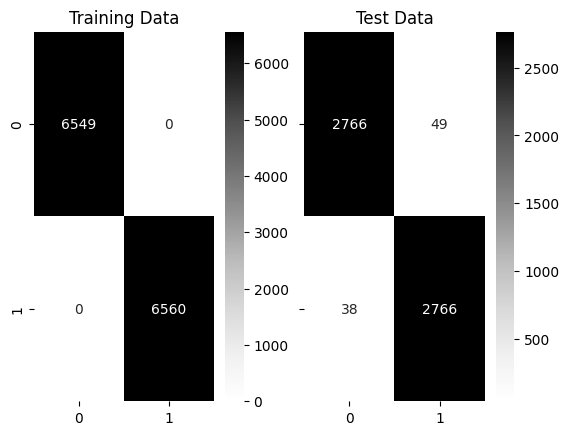

In [120]:
print(" confusion matrix Train variables for Ensemble Random Forest Classifier ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train_EN_RF, pred_class_train_EN_RF),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(metrics.confusion_matrix(y_test_EN_RF, pred_class_test_EN_RF),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

**Plot ROC curve and get ROC_AUC**

AUC and ROC FOR Ensemble Random Forest Classifier
AUC for the Training Data: 1.000
AUC for the Test Data: 0.999


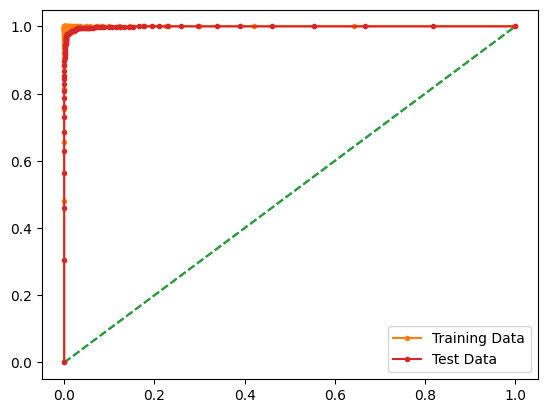

In [121]:
print("AUC and ROC FOR Ensemble Random Forest Classifier")

EN_RF_pred_prob_train = model_EN_RF.predict_proba(X_train_EN_RF)

EN_RF_pred_prob_test = model_EN_RF.predict_proba(X_test_EN_RF)

# AUC and ROC for the training data

# calculate AUC
EN_RF_train_auc = metrics.roc_auc_score(y_train_EN_RF,EN_RF_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % EN_RF_train_auc)

#  calculate roc curve
EN_RF_train_fpr, EN_RF_train_tpr, thresholds = metrics.roc_curve(y_train_EN_RF,EN_RF_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(EN_RF_train_fpr, EN_RF_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
EN_RF_test_auc = metrics.roc_auc_score(y_test_EN_RF,EN_RF_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % EN_RF_test_auc)

#  calculate roc curve
EN_RF_test_fpr,EN_RF_test_tpr, thresholds = metrics.roc_curve(y_test_EN_RF,EN_RF_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(EN_RF_test_fpr, EN_RF_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Performance of Predictions on Train and Test sets of Ensemble Bagging Classifier**

**Accuracy**

In [122]:
print("Accuracy score  for Ensemble Bagging Classifier  train variables ")
EN_BG_model_train_score = model_EN_BG.score(X_train_EN_BG, y_train_EN_BG)
print (EN_BG_model_train_score)

Accuracy score  for Ensemble Bagging Classifier  train variables 
0.9999237165306278


In [123]:
print("Accuracy score  for Ensemble Bagging Classifier  test variables ")
EN_BG_model_test_score  = model_EN_BG.score(X_test_EN_BG, y_test_EN_BG)
print (EN_BG_model_test_score)

Accuracy score  for Ensemble Bagging Classifier  test variables 
0.9823812066203951


**Training Data and Test Data Confusion Matrix Comparison**

 confusion matrix Train variables for Ensemble Bagging Classifier 


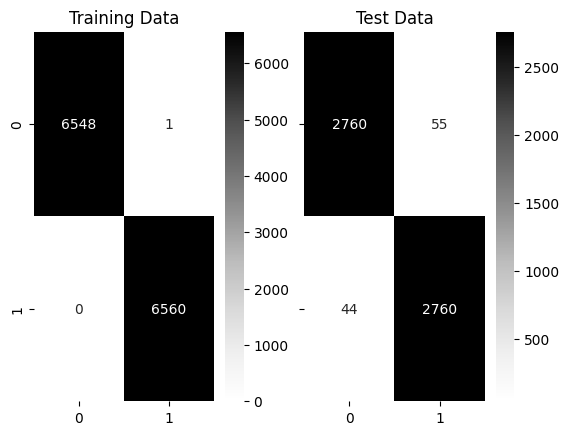

In [124]:
print(" confusion matrix Train variables for Ensemble Bagging Classifier ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train_EN_BG, pred_class_train_EN_BG),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(metrics.confusion_matrix(y_test_EN_BG, pred_class_test_EN_BG),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

**Classification Report**

In [125]:
print("Ensemble Bagging Classifier Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_EN_BG,pred_class_train_EN_BG),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test_EN_BG, pred_class_test_EN_BG),'\n')

Ensemble Bagging Classifier Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2815
           1       0.98      0.98      0.98      2804

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619
 



**Plot ROC curve and get ROC_AUC**

AUC and ROC FOR Ensemble Bagging Classifier
AUC for the Training Data: 1.000
AUC for the Test Data: 0.997


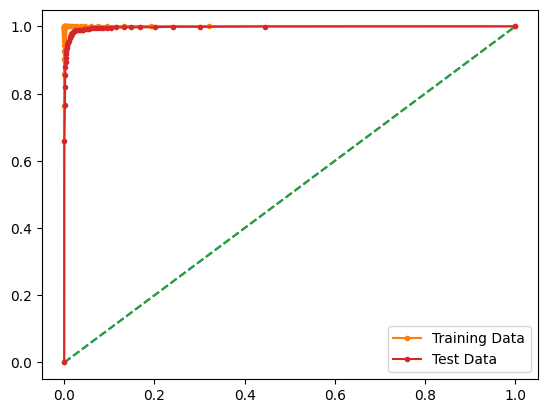

In [126]:
print("AUC and ROC FOR Ensemble Bagging Classifier")

EN_BG_pred_prob_train = model_EN_BG.predict_proba(X_train_EN_BG)

EN_BG_pred_prob_test = model_EN_BG.predict_proba(X_test_EN_BG)

# AUC and ROC for the training data

# calculate AUC
EN_BG_train_auc = metrics.roc_auc_score(y_train_EN_BG,EN_BG_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % EN_BG_train_auc)

#  calculate roc curve
EN_BG_train_fpr, EN_BG_train_tpr, thresholds = metrics.roc_curve(y_train_EN_BG,EN_BG_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(EN_BG_train_fpr,EN_BG_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
EN_BG_test_auc = metrics.roc_auc_score(y_test_EN_BG,EN_BG_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % EN_BG_test_auc)

#  calculate roc curve
EN_BG_test_fpr,EN_BG_test_tpr, thresholds = metrics.roc_curve(y_test_EN_BG,EN_BG_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(EN_BG_test_fpr, EN_BG_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Performance of Predictions on Train and Test sets of Ensemble Gradient Boosting**

**Accuracy**

In [127]:
print("Accuracy score  for Ensemble Gradient Boosting train variables ")
EN_GB_model_train_score = model_EN_GB.score(X_train_EN_GB, y_train_EN_GB)
print (EN_GB_model_train_score)

Accuracy score  for Ensemble Gradient Boosting train variables 
0.8980090014493859


In [128]:
print("Accuracy score  for Ensemble Gradient Boosting  test variables ")
EN_GB_model_test_score  = model_EN_GB.score(X_test_EN_GB, y_test_EN_GB)
print (EN_GB_model_test_score)

Accuracy score  for Ensemble Gradient Boosting  test variables 
0.8916177255739456


**Training Data and Test Data Confusion Matrix Comparison**

 confusion matrix Train variables for Ensemble Gradient Boosting


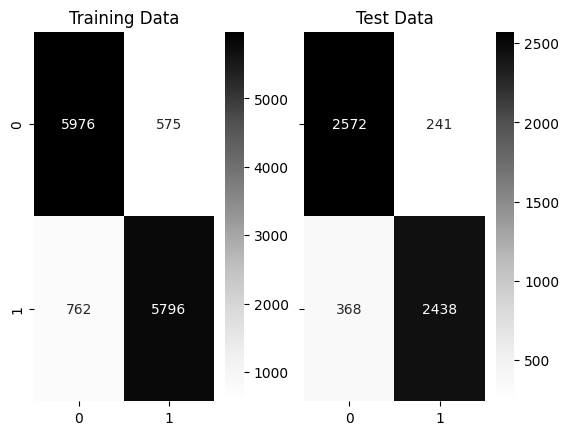

In [129]:
print(" confusion matrix Train variables for Ensemble Gradient Boosting")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train_EN_GB, pred_class_train_EN_GB),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(metrics.confusion_matrix(y_test_EN_GB, pred_class_test_EN_GB),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

**Classification Report**

In [130]:
print("Ensemble Gradient Boosting Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_EN_GB,pred_class_train_EN_GB),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test_EN_GB, pred_class_test_EN_GB),'\n')

Ensemble Gradient Boosting Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.91      0.90      6551
           1       0.91      0.88      0.90      6558

    accuracy                           0.90     13109
   macro avg       0.90      0.90      0.90     13109
weighted avg       0.90      0.90      0.90     13109
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.91      0.89      2813
           1       0.91      0.87      0.89      2806

    accuracy                           0.89      5619
   macro avg       0.89      0.89      0.89      5619
weighted avg       0.89      0.89      0.89      5619
 



**Plot ROC curve and get ROC_AUC**

AUC and ROC FOR Ensemble Gradient Boosting


AUC for the Training Data: 0.964
AUC for the Test Data: 0.959


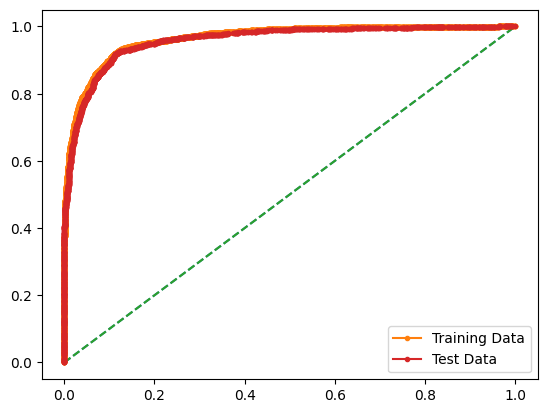

In [131]:
print("AUC and ROC FOR Ensemble Gradient Boosting")

EN_GB_pred_prob_train = model_EN_GB.predict_proba(X_train_EN_GB)

EN_GB_pred_prob_test = model_EN_GB.predict_proba(X_test_EN_GB)

# AUC and ROC for the training data

# calculate AUC
EN_GB_train_auc = metrics.roc_auc_score(y_train_EN_GB,EN_GB_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % EN_GB_train_auc)

#  calculate roc curve
EN_GB_train_fpr, EN_GB_train_tpr, thresholds = metrics.roc_curve(y_train_EN_GB,EN_GB_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(EN_GB_train_fpr, EN_GB_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
EN_GB_test_auc = metrics.roc_auc_score(y_test_EN_GB,EN_GB_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % EN_GB_test_auc)

#  calculate roc curve
EN_GB_test_fpr,EN_GB_test_tpr, thresholds = metrics.roc_curve(y_test_EN_GB,EN_GB_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(EN_GB_test_fpr, EN_GB_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Interpretation of the most optimum model and its implication on the business

In [132]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [133]:
#Logistic regression Classfication -Train
cmetrics_LR_train = classification_report(y_train,pred_class_train_LR,output_dict=True)
df_LR_train=pd.DataFrame(cmetrics_LR_train).transpose()
LR_train_f1=round(df_LR_train.loc["0"][2],2)
LR_train_recall=round(df_LR_train.loc["0"][1],2)
LR_train_precision=round(df_LR_train.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/2997810272.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  LR_train_f1=round(df_LR_train.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/2997810272.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  LR_train_recall=round(df_LR_train.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/2997810272.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a va

In [134]:
#Logistic regression Classfication -Test
cmetrics_LR_test = classification_report(y_test,pred_class_test_LR,output_dict=True)
df_LR_test=pd.DataFrame(cmetrics_LR_test).transpose()
LR_test_f1=round(df_LR_test.loc["0"][2],2)
LR_test_recall=round(df_LR_test.loc["0"][1],2)
LR_test_precision=round(df_LR_test.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1401856731.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  LR_test_f1=round(df_LR_test.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1401856731.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  LR_test_recall=round(df_LR_test.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1401856731.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value 

In [135]:
#KNN Model Classfication -Train
cmetrics_KNN_train = classification_report(y_train_KNN,pred_class_train_KNN,output_dict=True)
df_KNN_train=pd.DataFrame(cmetrics_KNN_train).transpose()
KNN_train_f1=round(df_KNN_train.loc["0"][2],2)
KNN_train_recall=round(df_KNN_train.loc["0"][1],2)
KNN_train_precision=round(df_KNN_train.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/3632430820.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  KNN_train_f1=round(df_KNN_train.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/3632430820.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  KNN_train_recall=round(df_KNN_train.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/3632430820.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

In [136]:
#KNN Model Classfication -test
cmetrics_KNN_test = classification_report(y_test_KNN,pred_class_test_KNN,output_dict=True)
df_KNN_test=pd.DataFrame(cmetrics_KNN_test).transpose()
KNN_test_f1=round(df_KNN_test.loc["0"][2],2)
KNN_test_recall=round(df_KNN_test.loc["0"][1],2)
KNN_test_precision=round(df_KNN_test.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/3446733305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  KNN_test_f1=round(df_KNN_test.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/3446733305.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  KNN_test_recall=round(df_KNN_test.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/3446733305.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a va

In [137]:
#Random Forest Classifier -Train
cmetrics_EN_RF_train = classification_report(y_train_EN_RF,pred_class_train_EN_RF,output_dict=True)
df_EN_RF_train=pd.DataFrame(cmetrics_EN_RF_train).transpose()
EN_RF_train_f1=round(df_EN_RF_train.loc["0"][2],2)
EN_RF_train_recall=round(df_EN_RF_train.loc["0"][1],2)
EN_RF_train_precision=round(df_EN_RF_train.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1169440971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_RF_train_f1=round(df_EN_RF_train.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1169440971.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_RF_train_recall=round(df_EN_RF_train.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1169440971.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

In [138]:
#Random Forest Classifier -test
cmetrics_EN_RF_test = classification_report(y_test_EN_RF,pred_class_test_EN_RF,output_dict=True)
df_EN_RF_test=pd.DataFrame(cmetrics_EN_RF_test).transpose()
EN_RF_test_f1=round(df_EN_RF_test.loc["0"][2],2)
EN_RF_test_recall=round(df_EN_RF_test.loc["0"][1],2)
EN_RF_test_precision=round(df_EN_RF_test.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/323859469.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_RF_test_f1=round(df_EN_RF_test.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/323859469.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_RF_test_recall=round(df_EN_RF_test.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/323859469.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

In [139]:
#Ensemble Bagging Classifier -Train
cmetrics_EN_BG_train = classification_report(y_train_EN_BG,pred_class_train_EN_BG,output_dict=True)
df_EN_BG_train=pd.DataFrame(cmetrics_EN_BG_train).transpose()
EN_BG_train_f1=round(df_EN_BG_train.loc["0"][2],2)
EN_BG_train_recall=round(df_EN_BG_train.loc["0"][1],2)
EN_BG_train_precision=round(df_EN_BG_train.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/659448679.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_BG_train_f1=round(df_EN_BG_train.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/659448679.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_BG_train_recall=round(df_EN_BG_train.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/659448679.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To ac

In [140]:
#Ensemble Bagging Classifier - test
cmetrics_EN_BG_test = classification_report(y_test_EN_BG,pred_class_test_EN_BG,output_dict=True)
df_EN_BG_test=pd.DataFrame(cmetrics_EN_BG_test).transpose()
EN_BG_test_f1=round(df_EN_BG_test.loc["0"][2],2)
EN_BG_test_recall=round(df_EN_BG_test.loc["0"][1],2)
EN_BG_test_precision=round(df_EN_BG_test.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1076756486.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_BG_test_f1=round(df_EN_BG_test.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1076756486.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_BG_test_recall=round(df_EN_BG_test.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1076756486.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

In [141]:
#Ensemble Gradient Boosting Classfication -Train
cmetrics_EN_GB_train = classification_report(y_train_EN_GB,pred_class_train_EN_GB_T,output_dict=True)
df_EN_GB_train=pd.DataFrame(cmetrics_EN_GB_train).transpose()
EN_GB_train_f1=round(df_EN_GB_train.loc["0"][2],2)
EN_GB_train_recall=round(df_EN_GB_train.loc["0"][1],2)
EN_GB_train_precision=round(df_EN_GB_train.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1878895232.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_GB_train_f1=round(df_EN_GB_train.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1878895232.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_GB_train_recall=round(df_EN_GB_train.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/1878895232.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

In [142]:
#Ensemble Gradient Boosting Classfication -Test
cmetrics_EN_GB_test = classification_report(y_test_EN_GB,pred_class_test_EN_GB_T,output_dict=True)
df_EN_GB_test=pd.DataFrame(cmetrics_EN_GB_test).transpose()
EN_GB_test_f1=round(df_EN_GB_test.loc["0"][2],2)
EN_GB_test_recall=round(df_EN_GB_test.loc["0"][1],2)
EN_GB_test_precision=round(df_EN_GB_test.loc["0"][0],2)

/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/272789203.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_GB_test_f1=round(df_EN_GB_test.loc["0"][2],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/272789203.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  EN_GB_test_recall=round(df_EN_GB_test.loc["0"][1],2)
/var/folders/0s/mcfk2d2s4cs_x0l3xd54y73r0000gr/T/ipykernel_3418/272789203.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

In [143]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic reg Train':[LR_model_train_score,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
        'Logistic reg Test':[LR_model_test_score,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
        'KNN Train':[KNN_model_train_score,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_model_test_score,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'Random Forest Train':[EN_RF_model_train_score,EN_RF_train_auc,EN_RF_train_recall,EN_RF_train_precision,EN_RF_train_f1],
        'Random Forest Test':[EN_RF_model_test_score,EN_RF_test_auc,EN_RF_test_recall,EN_RF_test_precision,EN_RF_test_f1],
        'Bagging cls. Train':[EN_BG_model_train_score,EN_BG_train_auc,EN_BG_train_recall,EN_BG_train_precision,EN_BG_train_f1],
        'Bagging cls. Test':[EN_BG_model_test_score,EN_BG_test_auc,EN_BG_test_recall,EN_BG_test_precision,EN_BG_test_f1],
        'Gradient Boosting Train':[EN_GB_model_train_score,EN_GB_train_auc,EN_GB_train_recall,EN_GB_train_precision,EN_GB_train_f1],
        'Gradient Boosting Test':[EN_GB_model_test_score,EN_GB_test_auc,EN_GB_test_recall,EN_BG_test_precision,EN_GB_test_f1]},index=index)
round(data,2)

,Logistic reg Train,Logistic reg Test,KNN Train,KNN Test,Random Forest Train,Random Forest Test,Bagging cls. Train,Bagging cls. Test,Gradient Boosting Train,Gradient Boosting Test
Accuracy,0.83,0.82,1.0,0.96,1.0,0.98,1.0,0.98,0.90,0.89
AUC,0.90,0.90,1.0,0.96,1.0,1.00,1.0,1.00,0.96,0.96
Recall,0.85,0.85,1.0,0.93,1.0,0.98,1.0,0.98,1.00,0.98
Precision,0.82,0.81,1.0,0.99,1.0,0.99,1.0,0.98,1.00,0.98
F1 Score,0.83,0.83,1.0,0.96,1.0,0.98,1.0,0.98,1.00,0.98


ROC curve for Train data 


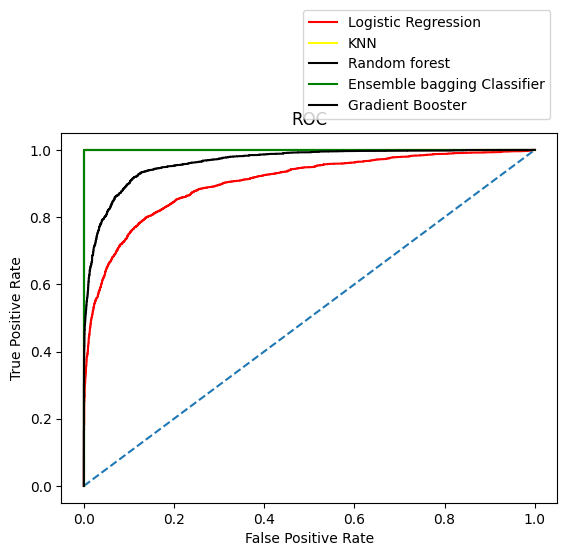

In [144]:
print("ROC curve for Train data ")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_train_fpr, LR_train_tpr,color='red',label="Logistic Regression")
plt.plot(KNN_train_fpr, KNN_train_tpr,color='yellow',label="KNN")
plt.plot(EN_RF_train_fpr, EN_RF_train_tpr,color='black',label="Random forest")
plt.plot(EN_BG_train_fpr, EN_BG_train_tpr,color='green',label="Ensemble bagging Classifier")
plt.plot(EN_GB_train_fpr, EN_GB_train_tpr,color='black',label="Gradient Booster")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC curve for Test data 


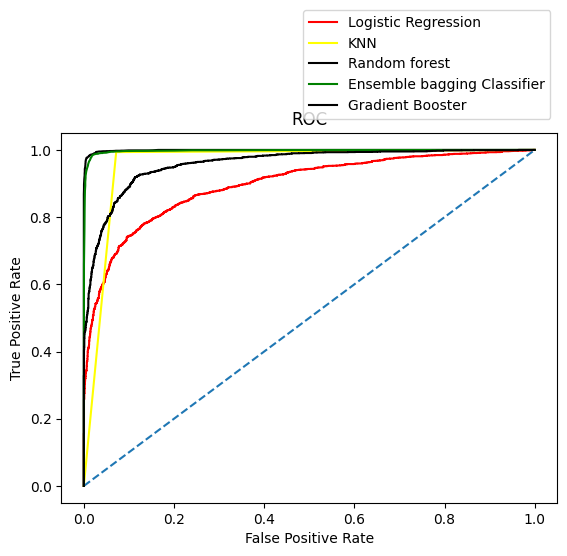

In [145]:
print("ROC curve for Test data ")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_test_fpr, LR_test_tpr,color='red',label="Logistic Regression")
plt.plot(KNN_test_fpr, KNN_test_tpr,color='yellow',label="KNN")
plt.plot(EN_RF_test_fpr, EN_RF_test_tpr,color='black',label="Random forest")
plt.plot(EN_BG_test_fpr, EN_BG_test_tpr,color='green',label="Ensemble bagging Classifier")
plt.plot(EN_GB_test_fpr, EN_GB_test_tpr,color='black',label="Gradient Booster")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')